## PROJECT 1: FUNDAMENTALS OF AIML - CARDIO GOOD FITNESS - Sai K (11/18/2022)

**Objective**

* Explore the dataset to identify differences between the customers of each product. 
* Also explore relationships between the different attributes of the customers. 
* Approach it from any other line of questioning that you feel could be relevant for the business. 

**Expected to do the following**

* Come up with a customer profile (characteristics of a customer) of the different products
* Perform univariate and multivariate analyses
* Generate a set of insights and recommendations that will help the company in targeting new customers.
 
**Data Dictionary**
The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables-

* Product - The model no. of the treadmill
* Age -  Age of the customer in no of years
* Gender - Gender of the customer
* Education - Education of the customer in no. of years
* Marital Status - Marital status of the customer
* Usage - Avg. # times the customer wants to use the treadmill every week
* Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
* Income - Income of the customer
* Miles- Miles that a customer expects to run

**Importing necessary libraries**

In [135]:
# Libraries to create dataframe and help with reading and manipulating data
import pandas as pd
import numpy as np
import datetime as dt

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Command to tell Python to actually display the graphs
%matplotlib inline

# Restrict the float values if present to 3 decimal values
pd.set_option('display.float_format',lambda x: '%.3f' %x)

**Importing the 'Cardio Good Fitness' csv file**

In [136]:
df = pd.read_csv('C:/Users/OneDrive/Desktop/Python/2_AIML_fundamentals/project/CardioGoodFitness.csv')

### Understanding the structure of the data

In [137]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [138]:
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [140]:
df.shape[:]

(180, 9)

In [141]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [142]:
df.duplicated().sum()

0

**Inferences**
* 9 Columns and 180 Rows are present in the dataset
* 'Product', 'Gender' and 'MaritalStatus' are Categorical variables
* 'Age', 'Education', 'Usage', 'Fitness', 'Income' and 'Miles' are Numerical variables
* NaN (Not a Number) values are NOT present in the dataset. All columns have 180 values included in the dataset
* No repeated rows are present

In [143]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000,180.000,180.000,180.000,180.000,180.000
mean,28.789,15.572,3.456,3.311,53719.578,103.194
std,6.943,1.617,1.085,0.959,16506.684,51.864
min,18.000,12.000,2.000,1.000,29562.000,21.000
25%,24.000,14.000,3.000,3.000,44058.750,66.000
50%,26.000,16.000,3.000,3.000,50596.500,94.000
75%,33.000,16.000,4.000,4.000,58668.000,114.750
max,50.000,21.000,7.000,5.000,104581.000,360.000


**Inferences**
* Age: Max Age is 50 years and 75% (Q3) <= 33 years. Young adult population consists of significant portion of customer base. 
* Income: mean (53,719.578) > Median (50,596.500). Income data could be right skewed and will need further analysis to confirm. 
* Miles: mean (103.194) > Median (94.000). Miles data could be right skewed and will need further analysis to confirm. 

In [144]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.000,NaN,NaN,NaN,28.789,6.943,18.000,24.000,26.000,33.000,50.000
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.000,NaN,NaN,NaN,15.572,1.617,12.000,14.000,16.000,16.000,21.000
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.000,NaN,NaN,NaN,3.456,1.085,2.000,3.000,3.000,4.000,7.000
Fitness,180.000,NaN,NaN,NaN,3.311,0.959,1.000,3.000,3.000,4.000,5.000
Income,180.000,NaN,NaN,NaN,53719.578,16506.684,29562.000,44058.750,50596.500,58668.000,104581.000
Miles,180.000,NaN,NaN,NaN,103.194,51.864,21.000,66.000,94.000,114.750,360.000


In [145]:
df['Product'].unique()

array(['TM195', 'TM498', 'TM798'], dtype=object)

In [146]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [147]:
df['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

**Inferences**

Categorical variables
* Product: There are (3) unique treadmill models that are being analyzed in the dataset.
* Gender: There are (2) unique Genders. 'Male' and 'Female'
* Marital Status: There are (2) unique Marital Status. 'Single' and 'Partnered'


### Univariate Data Analysis 

**Age**

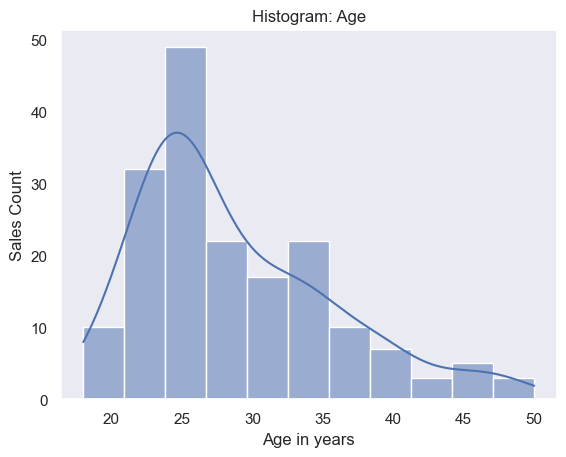

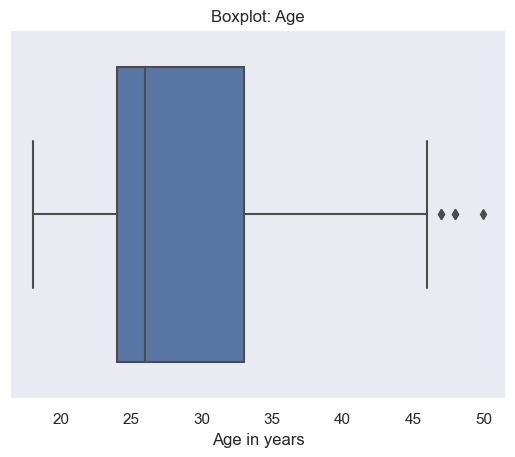

In [148]:
sns.histplot(data = df, x = 'Age', kde = True)
plt.title('Histogram: Age')
plt.xlabel('Age in years')
plt.ylabel('Sales Count')
sns.set(style="dark")
plt.show()
sns.boxplot(data = df, x = 'Age');
plt.title('Boxplot: Age')
plt.xlabel('Age in years')
sns.set(style="dark")
plt.show()

**Inferences**

Age
* Data is right skewed
* Young adult population consists of significant portion of customer base.

**Education**

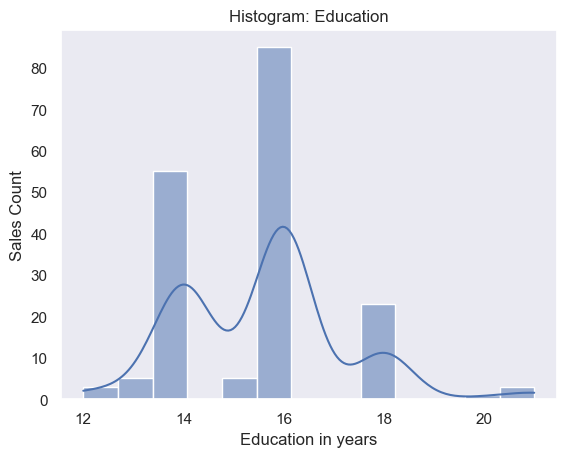

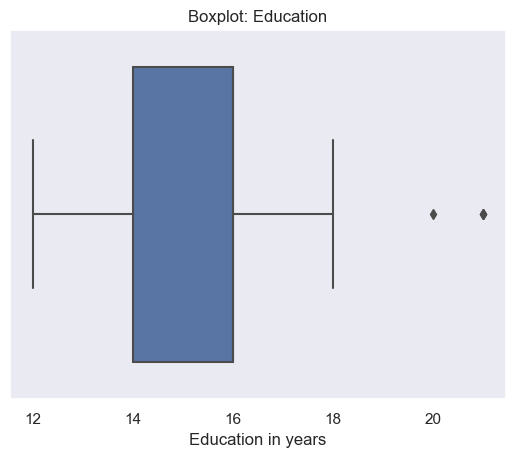

In [149]:
sns.histplot(data = df, x = 'Education', kde = True)
plt.title('Histogram: Education')
plt.xlabel('Education in years')
plt.ylabel('Sales Count')
sns.set(style="dark")
plt.show()
sns.boxplot(data = df, x = 'Education');
plt.title('Boxplot: Education')
plt.xlabel('Education in years')
sns.set(style="dark")
plt.show()

**Inferences**

Education
* Data tends to have multinomial distribution with outliers at right whisker

**Usage**

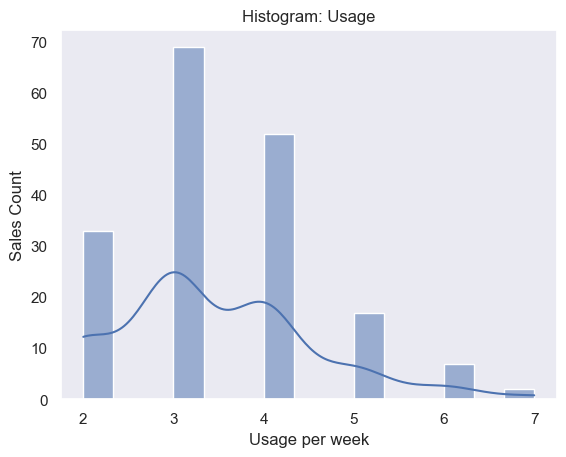

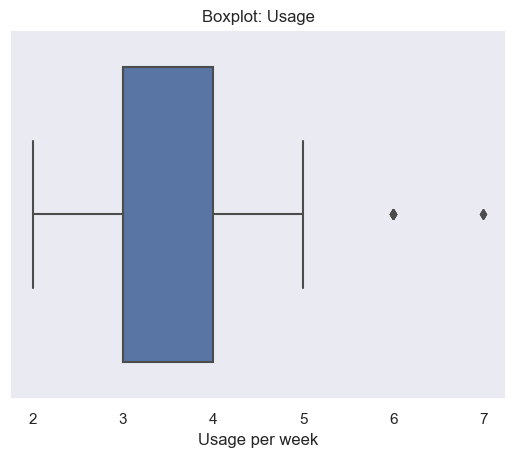

In [150]:
sns.histplot(data = df, x = 'Usage', kde = True);
plt.title('Histogram: Usage')
plt.xlabel('Usage per week')
plt.ylabel('Sales Count')
sns.set(style="dark")
plt.show()
sns.boxplot(data = df, x = 'Usage');
plt.title('Boxplot: Usage')
plt.xlabel('Usage per week')
sns.set(style="dark")
plt.show()

**Inferences**

Usage
* Data is right skewed and has outliers

**Fitness**

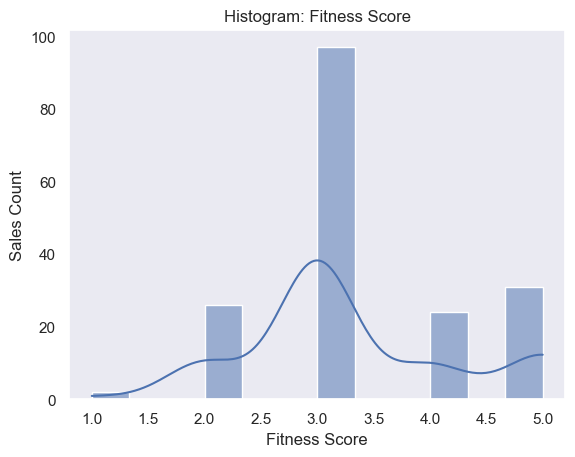

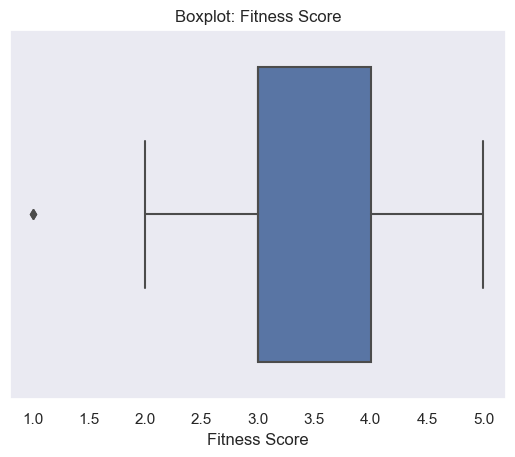

In [151]:
sns.histplot(data = df, x = 'Fitness', kde = True);
plt.title('Histogram: Fitness Score')
plt.xlabel('Fitness Score')
plt.ylabel('Sales Count')
sns.set(style="dark")
plt.show()
sns.boxplot(data = df, x = 'Fitness');
plt.title('Boxplot: Fitness Score')
plt.xlabel('Fitness Score')
sns.set(style="dark")
plt.show()

In [152]:
df.loc[df['Fitness'] < 2]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
14,TM195,23,Male,16,Partnered,3,1,38658,47
117,TM498,31,Female,18,Single,2,1,65220,21


**Inferences**

Fitness
* Out of 180 data values only (2) Fitness scores are 1.0
* Mode of the data set is (3) as it is the most occurring.  

**Income**

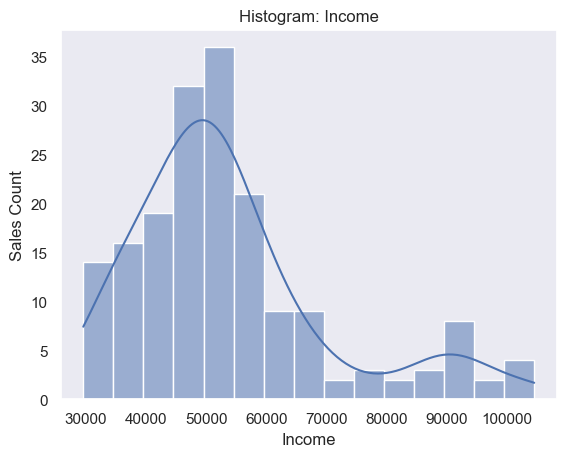

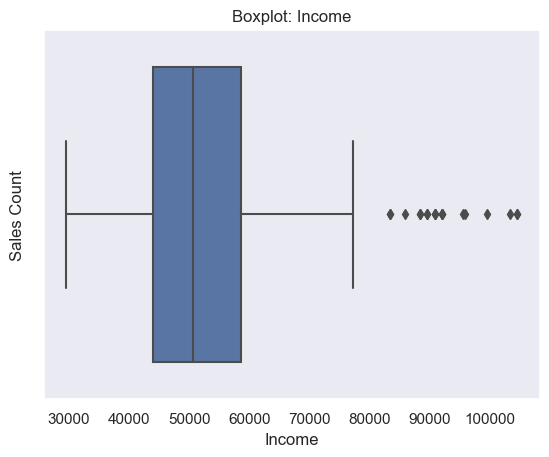

In [153]:
sns.histplot(data = df, x = 'Income', kde = True);
plt.title('Histogram: Income')
plt.xlabel('Income')
plt.ylabel('Sales Count')
sns.set(style="dark")
plt.show()
sns.boxplot(data = df, x = 'Income');
plt.title('Boxplot: Income')
plt.xlabel('Income')
plt.ylabel('Sales Count')
sns.set(style="dark")
plt.show()

**Inferences**

Income
* Data is right skewed with outliers. 

**Miles**

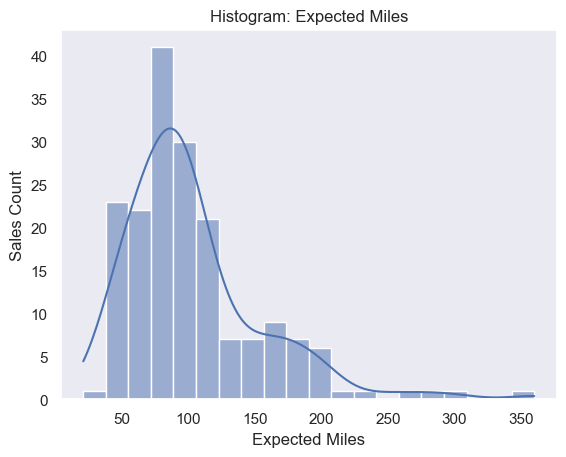

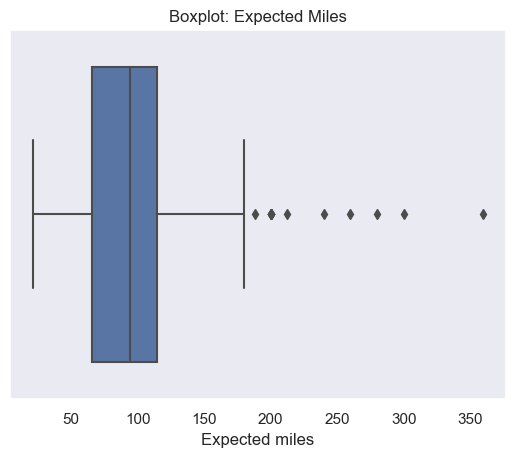

In [154]:
sns.histplot(data = df, x = 'Miles', kde = True);
plt.title('Histogram: Expected Miles')
plt.xlabel('Expected Miles')
plt.ylabel('Sales Count')
sns.set(style="dark")
plt.show()
sns.boxplot(data = df, x = 'Miles');
plt.title('Boxplot: Expected Miles')
plt.xlabel('Expected miles')
sns.set(style="dark")
plt.show()

**Inferences**

Miles
* Data is right skewed with outliers. 

**All Numerical Variables**

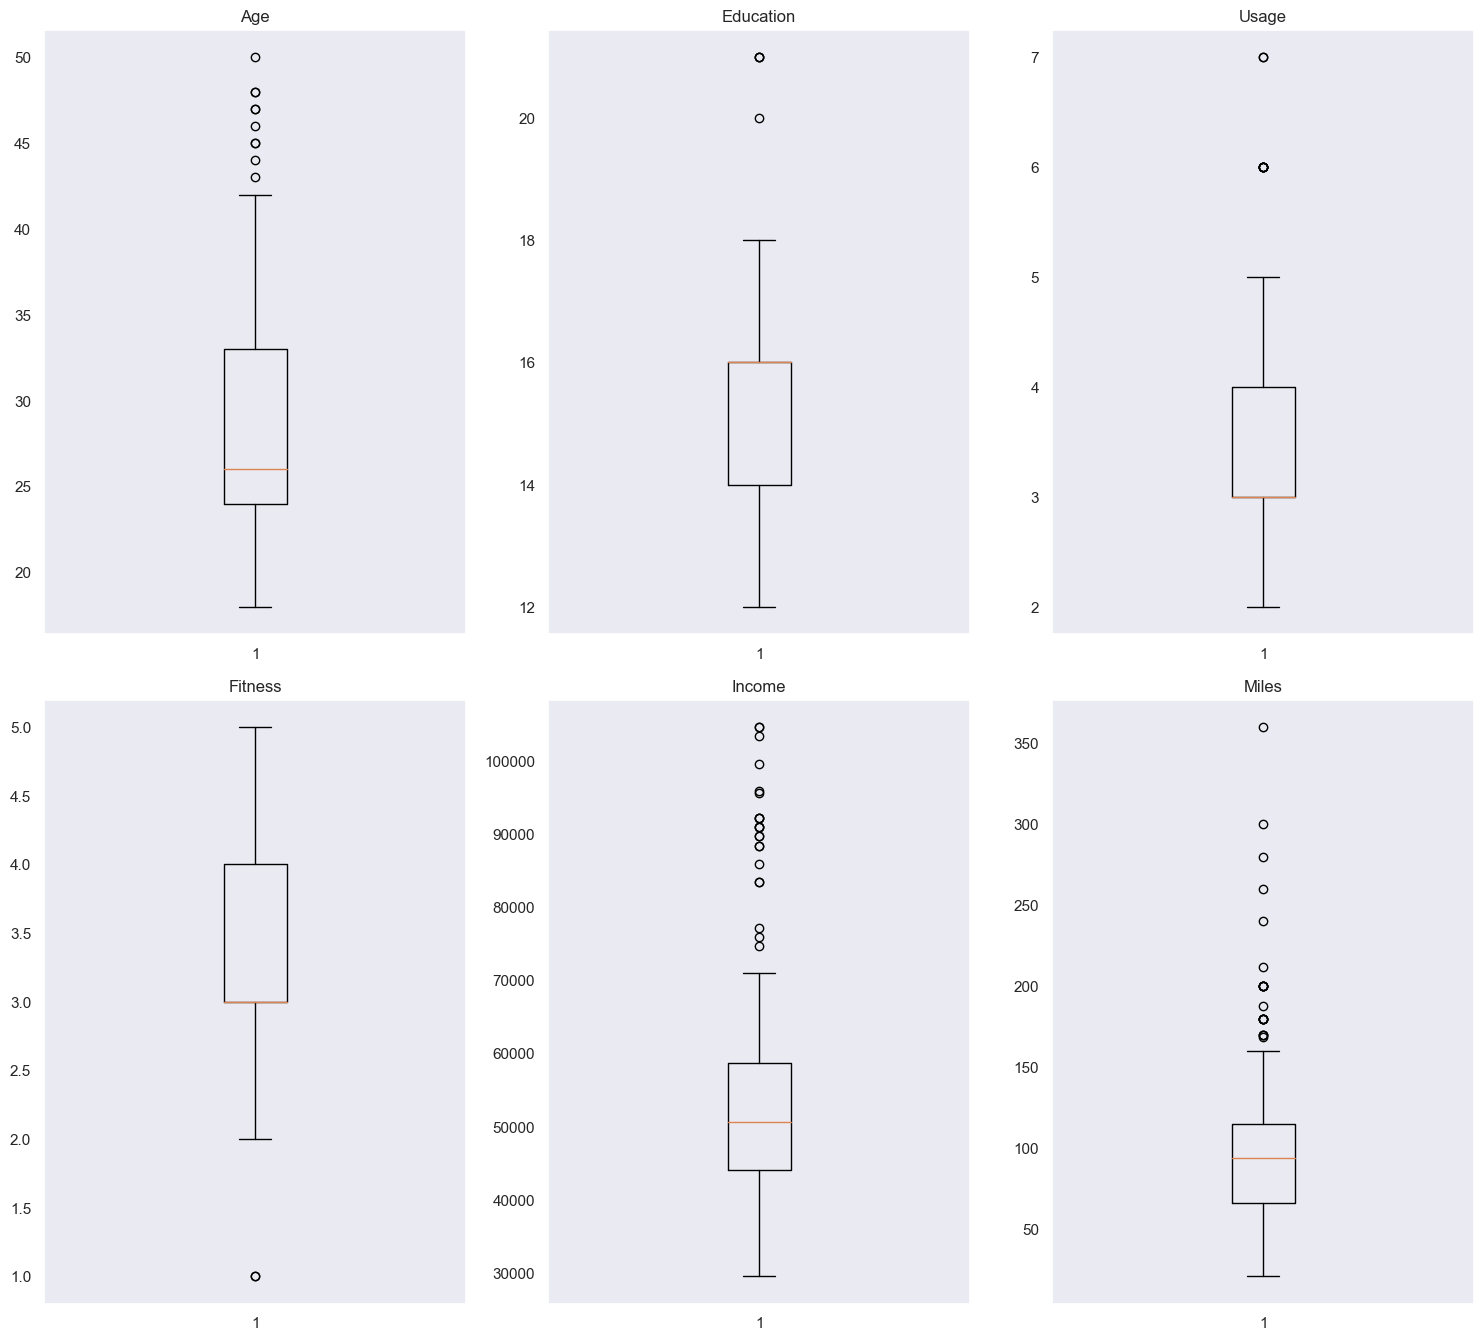

In [155]:
# creating boxplots for all numerical variables using for loop
# selecting the numerical columns of data and adding their names in a list 
numeric_columns = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
plt.figure(figsize=(15, 20))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    plt.boxplot(df[variable], whis=1)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Inferences**

Numerical variables
* Income and Miles data have the most outliers in comparison to other variables. 

**Age Groups**

Creating a new column called as 'Age Group' using pandas cut method to understand age distribution. 

In [156]:
df['Agegroup'] = pd.cut(df['Age'],bins=[0,20,25,30,35,40,45,50,100],labels=['0-20','20-25','25-30','30-35','35-40','40-45','45-50','50-100'])

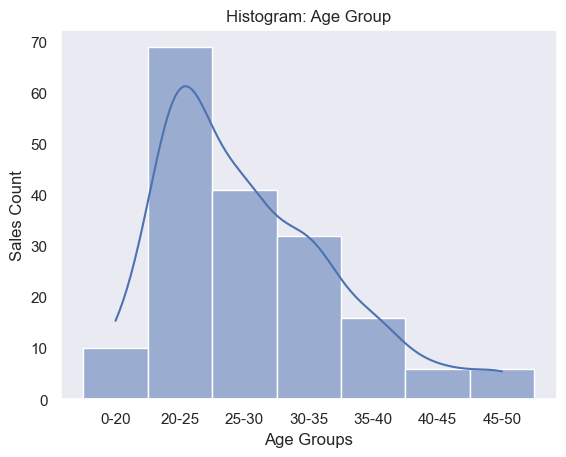

In [157]:
sns.histplot(data = df, x = 'Agegroup', kde = True);
plt.title('Histogram: Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Sales Count')
sns.set(style="dark")

In [158]:
df['Agegroup'].value_counts(normalize = True)*100

20-25    38.333
25-30    22.778
30-35    17.778
35-40     8.889
0-20      5.556
40-45     3.333
45-50     3.333
50-100    0.000
Name: Agegroup, dtype: float64

**Inferences**

Age Group
* 20-25 Age group has highest sales percentage. 
* 50-100 Age group has no sales
* 20-25 Age group has highest sales percentage at 38% followed by 25-30 at 22% and 30-35 at 17.7%. Together these age group comprise of 78% of the sales. 

**Product**

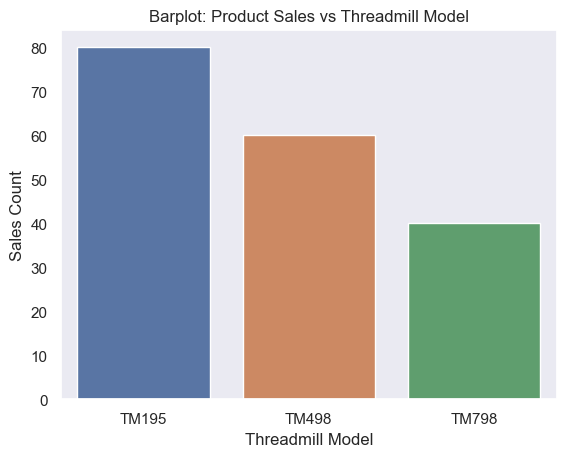

In [159]:
sns.countplot(data=df,x='Product')
plt.title('Barplot: Product Sales vs Threadmill Model')
plt.xlabel('Threadmill Model')
plt.ylabel('Sales Count')
sns.set(style="dark")
plt.show()

In [160]:
df['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [161]:
df['Product'].value_counts(normalize = True)*100

TM195   44.444
TM498   33.333
TM798   22.222
Name: Product, dtype: float64

**Inferences** 
* Model TM195 is the flagship product. Accounts for 44% of total sales. 
* Model T498 is the second highest sold product. Accounts for 33% of sales.
* Model TM798 is the least sold product among the three thread mills. Accounts for 22% of sales.

**Marital Status**

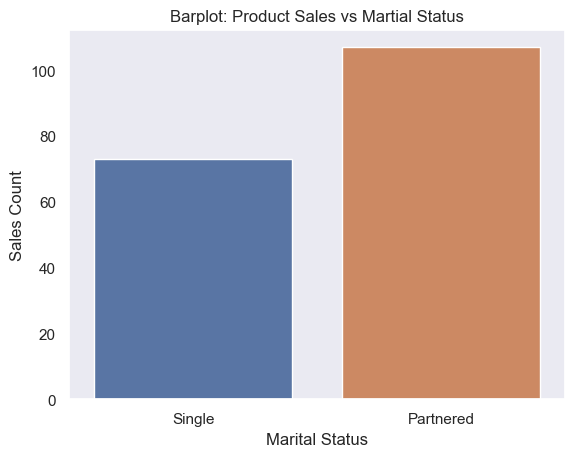

In [162]:
sns.countplot(data=df,x='MaritalStatus')
plt.title('Barplot: Product Sales vs Martial Status')
plt.xlabel('Marital Status')
plt.ylabel('Sales Count')
sns.set(style="dark")
plt.show()

In [163]:
df['MaritalStatus'].value_counts(normalize = True)*100

Partnered   59.444
Single      40.556
Name: MaritalStatus, dtype: float64

**Inferences** 
* Partnered customers have more sales in comparison to Single customers.

**Gender**

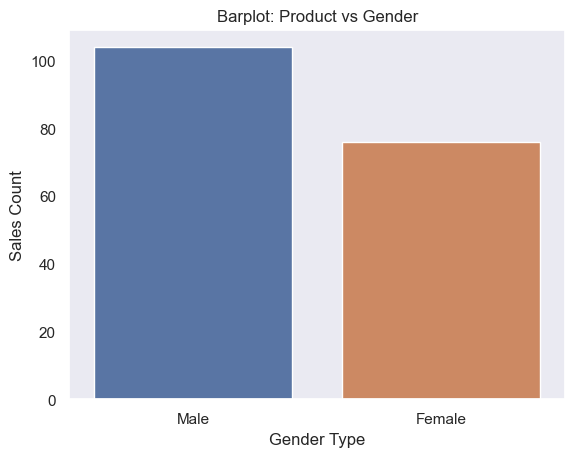

In [164]:
sns.countplot(data=df,x='Gender')
plt.title('Barplot: Product vs Gender')
plt.xlabel('Gender Type')
plt.ylabel('Sales Count')
sns.set(style="dark")
plt.show()

In [165]:
df['Gender'].value_counts(normalize = True)*100

Male     57.778
Female   42.222
Name: Gender, dtype: float64

In [166]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

**Inferences** 
* Male customers have more sales in comparison to female customers.

**Categorical Varibales**

In [167]:
# using for loop to underderstand the percentage in all categorical varibles
cat_cols =  ['Product', 'Gender', 'MaritalStatus', 'Agegroup']
for column in cat_cols:
    print(df[column].value_counts(normalize = True)*100)
    print(f'\n\n')

TM195   44.444
TM498   33.333
TM798   22.222
Name: Product, dtype: float64



Male     57.778
Female   42.222
Name: Gender, dtype: float64



Partnered   59.444
Single      40.556
Name: MaritalStatus, dtype: float64



20-25    38.333
25-30    22.778
30-35    17.778
35-40     8.889
0-20      5.556
40-45     3.333
45-50     3.333
50-100    0.000
Name: Agegroup, dtype: float64





**Inferences**

* Product: Model TM195 is the flagship product. Accounts for 44% of total sales.
* Product: Model T498 is the second highest sold product. Accounts for 33% of sales.
* Product: Model TM798 is the least sold product among the three thread mills. Accounts for 22% of sales.
* Marital Status: Partnered customers has more sales in comparision to Single customers.
* Gender: Male customers has more sales in comparision to female customers.
* Male: 20-25 Age group has highest sales percentage.
* Male: 50-100 Age group has no sales

### Bivariate Data Analysis

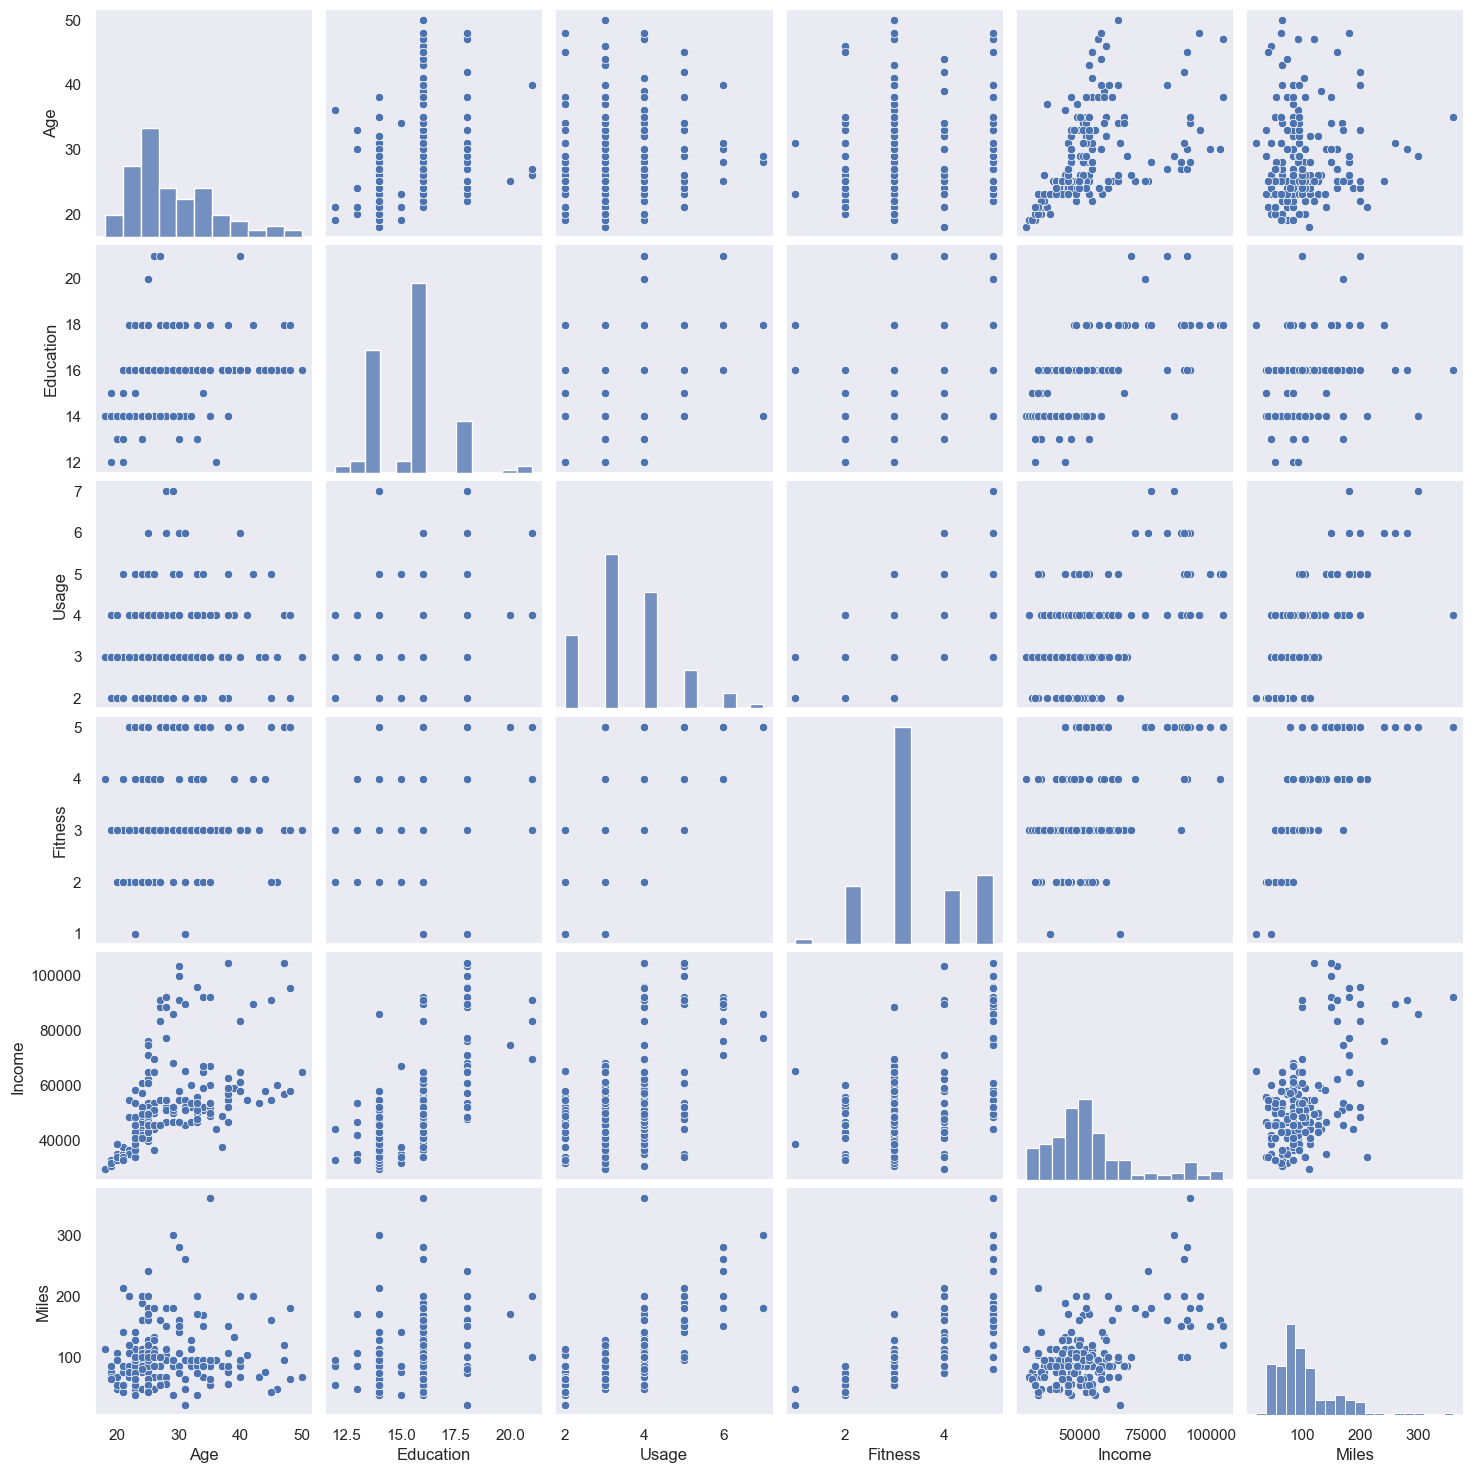

In [168]:
sns.pairplot(data=df[['Age','Education','Usage','Fitness','Income','Miles']]);

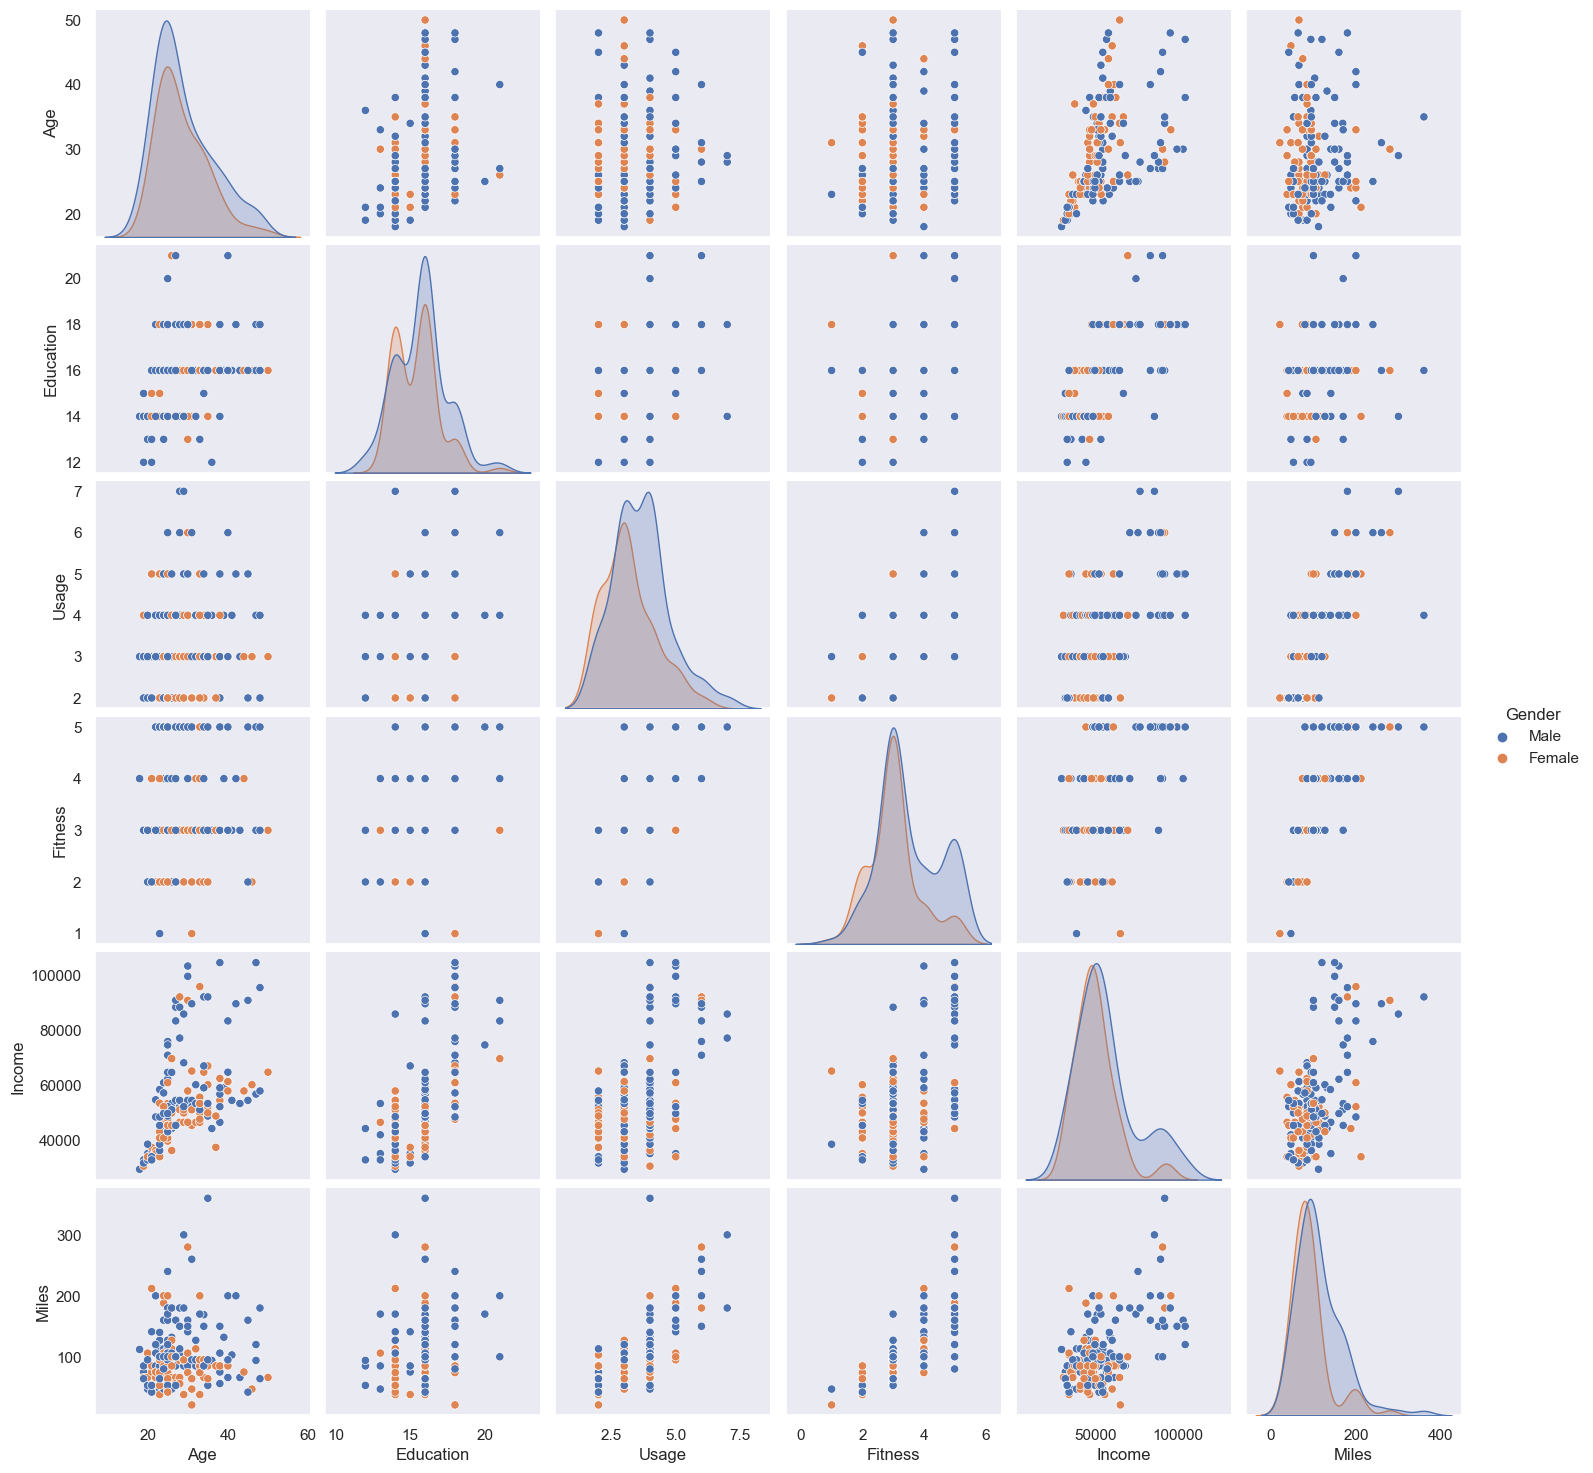

In [169]:
sns.pairplot(data=df, vars = ['Age','Education','Usage','Fitness','Income','Miles'], hue = 'Gender');

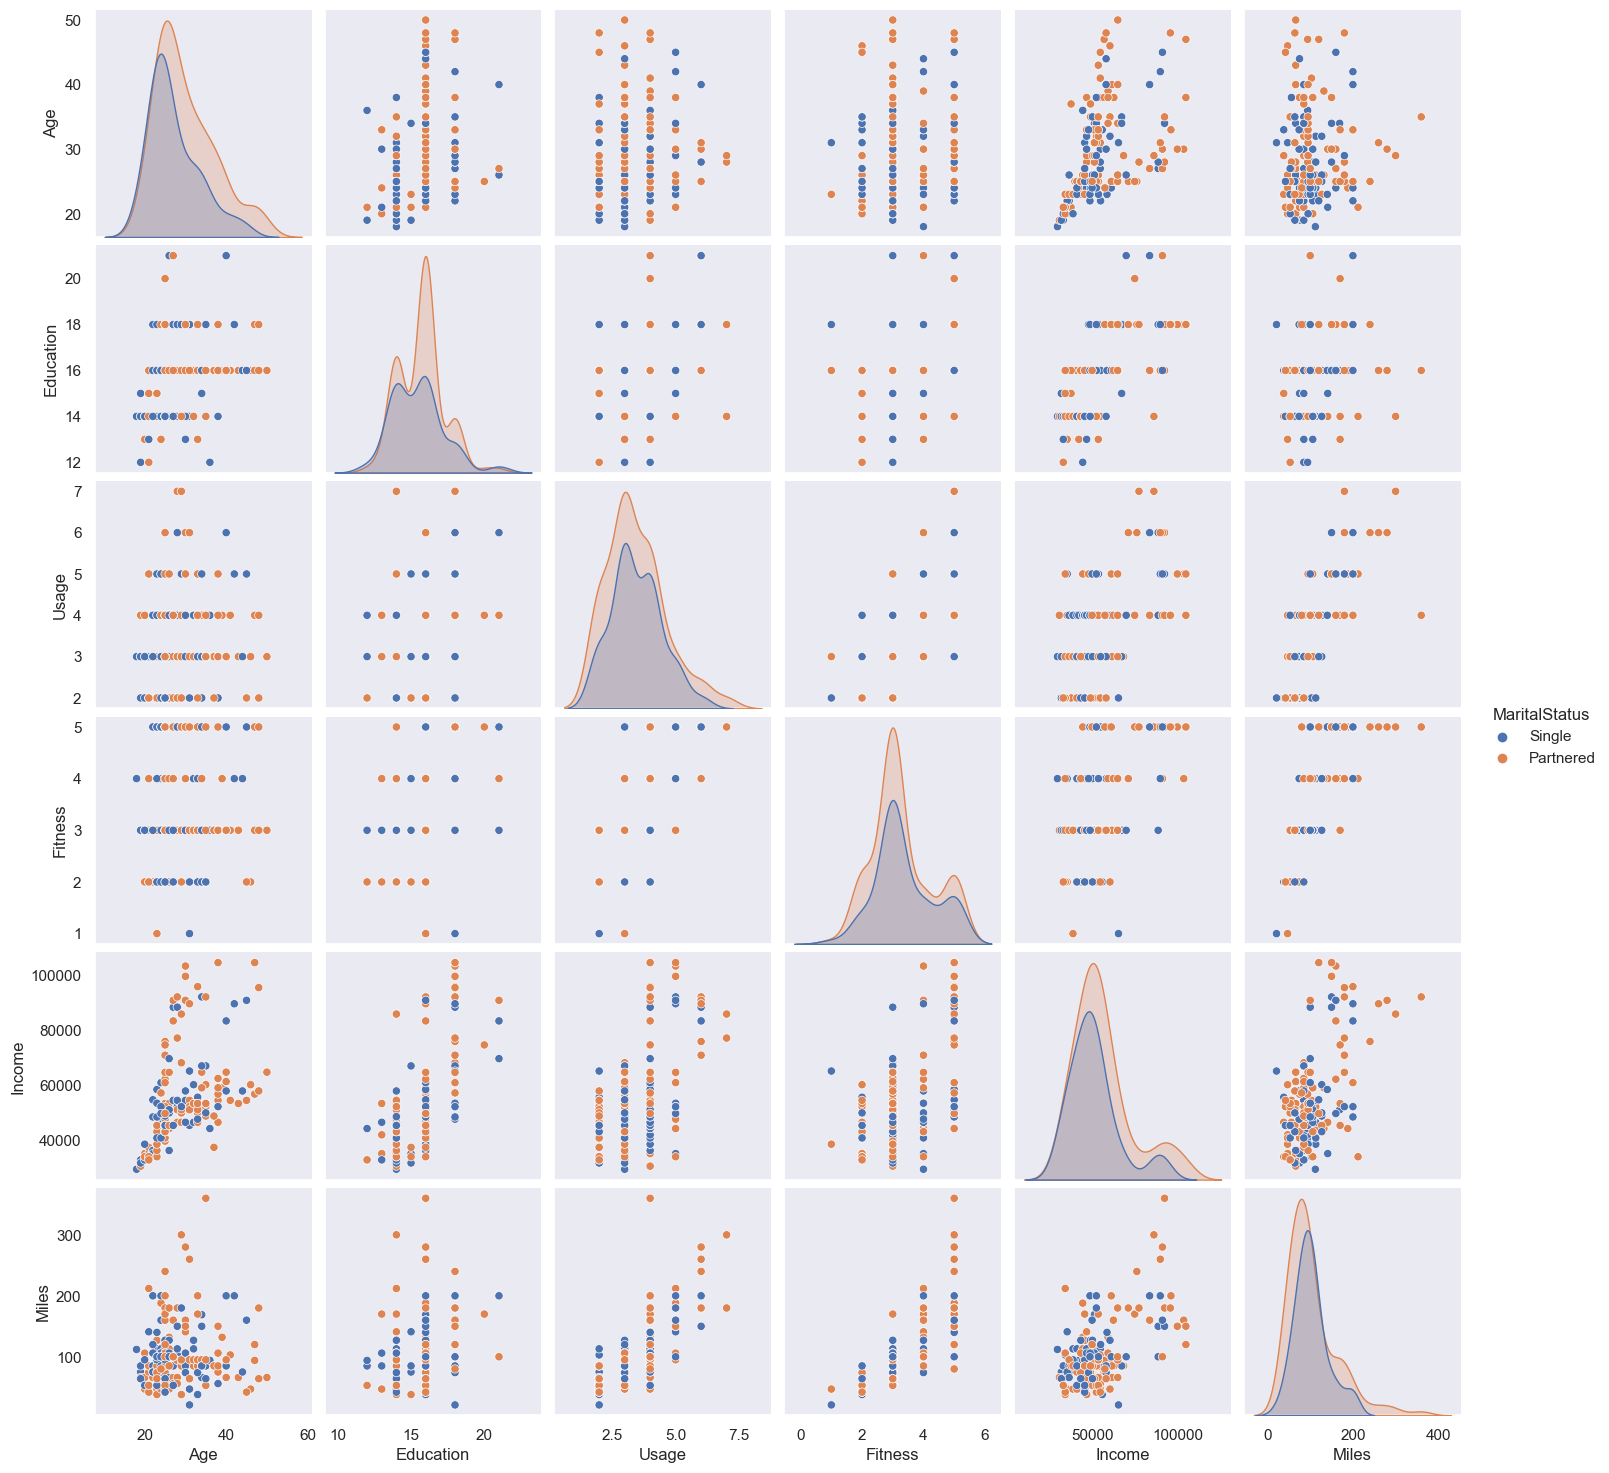

In [170]:
sns.pairplot(data=df, vars = ['Age','Education','Usage','Fitness','Income','Miles'], hue = 'MaritalStatus');

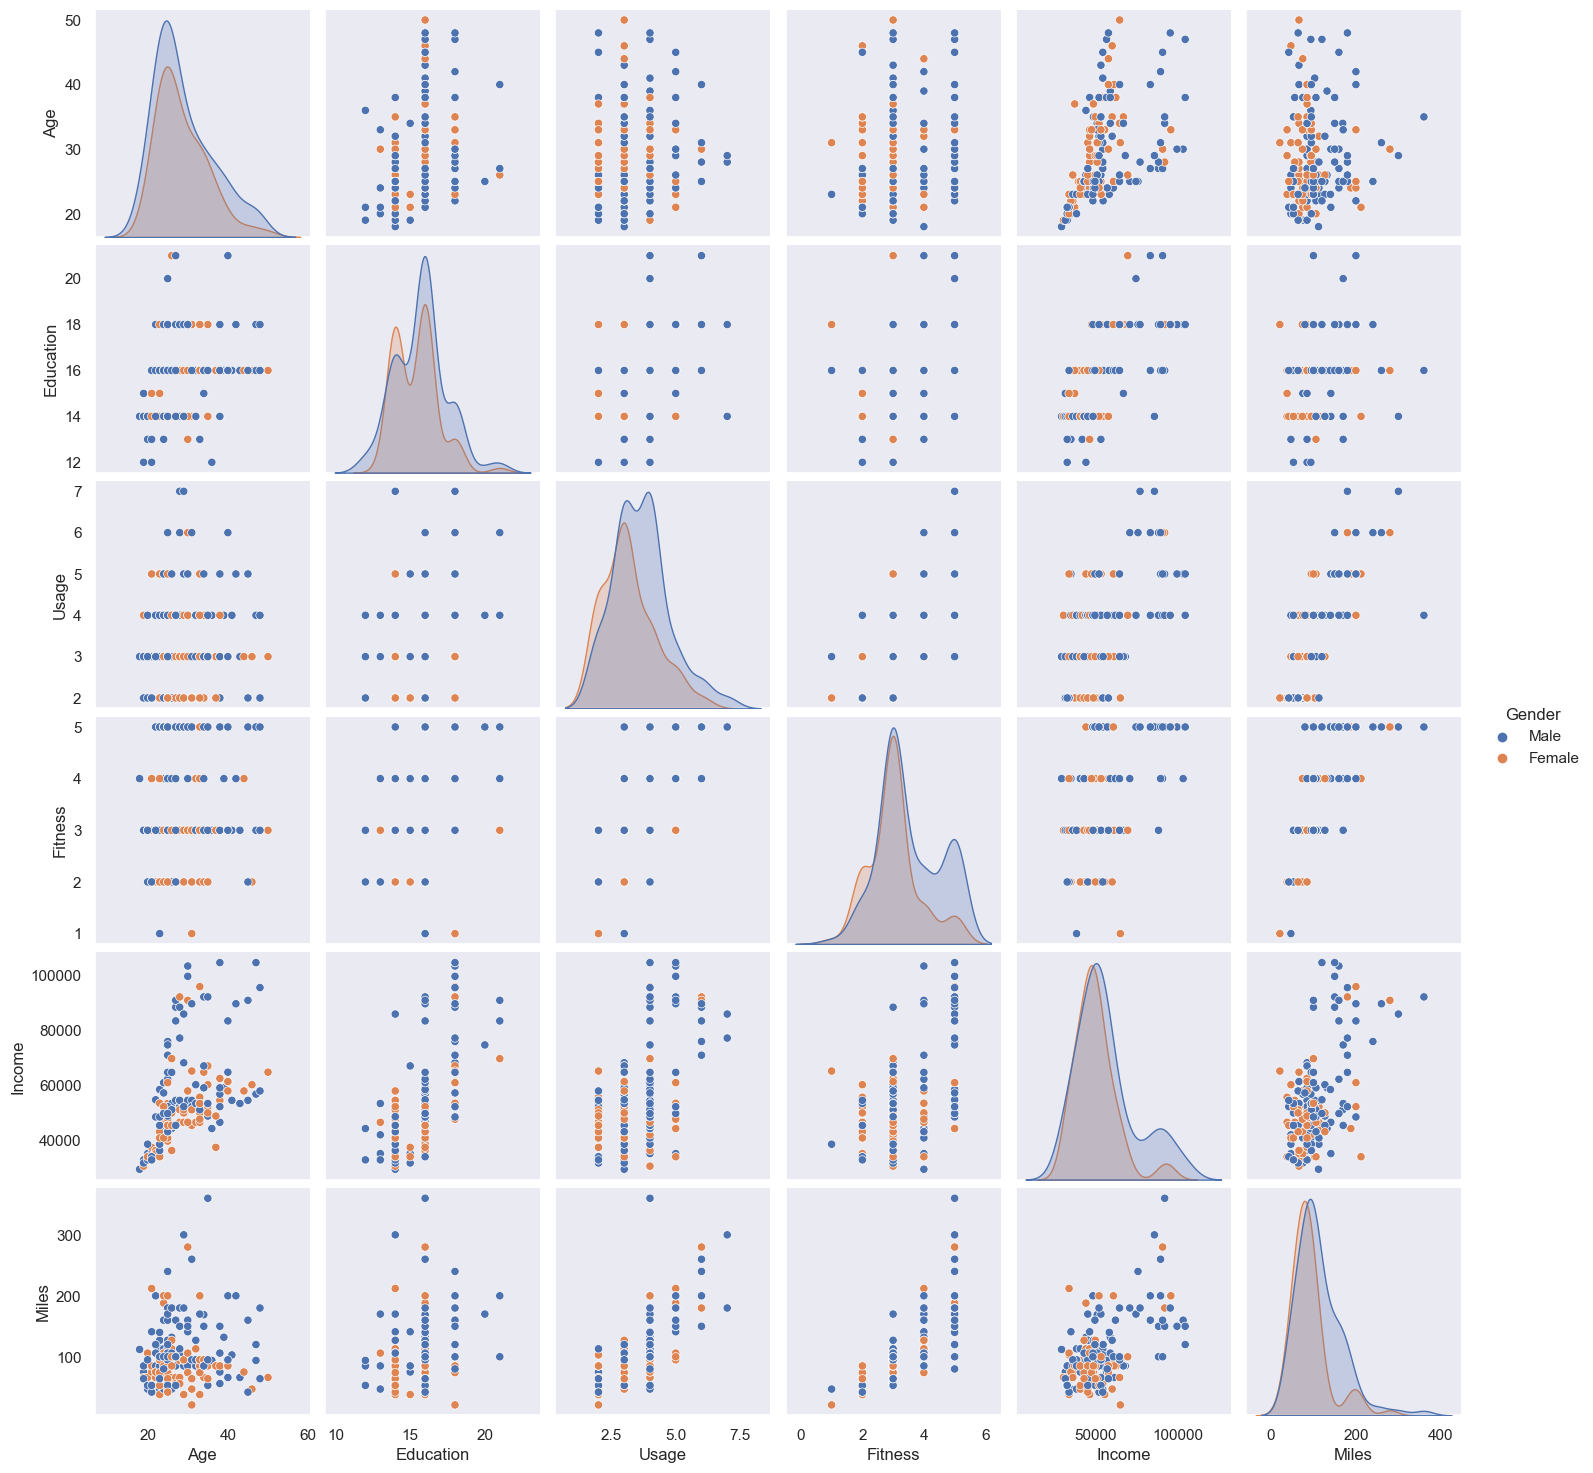

In [171]:
sns.pairplot(data=df, vars = ['Age','Education','Usage','Fitness','Income','Miles'], hue = 'Gender');

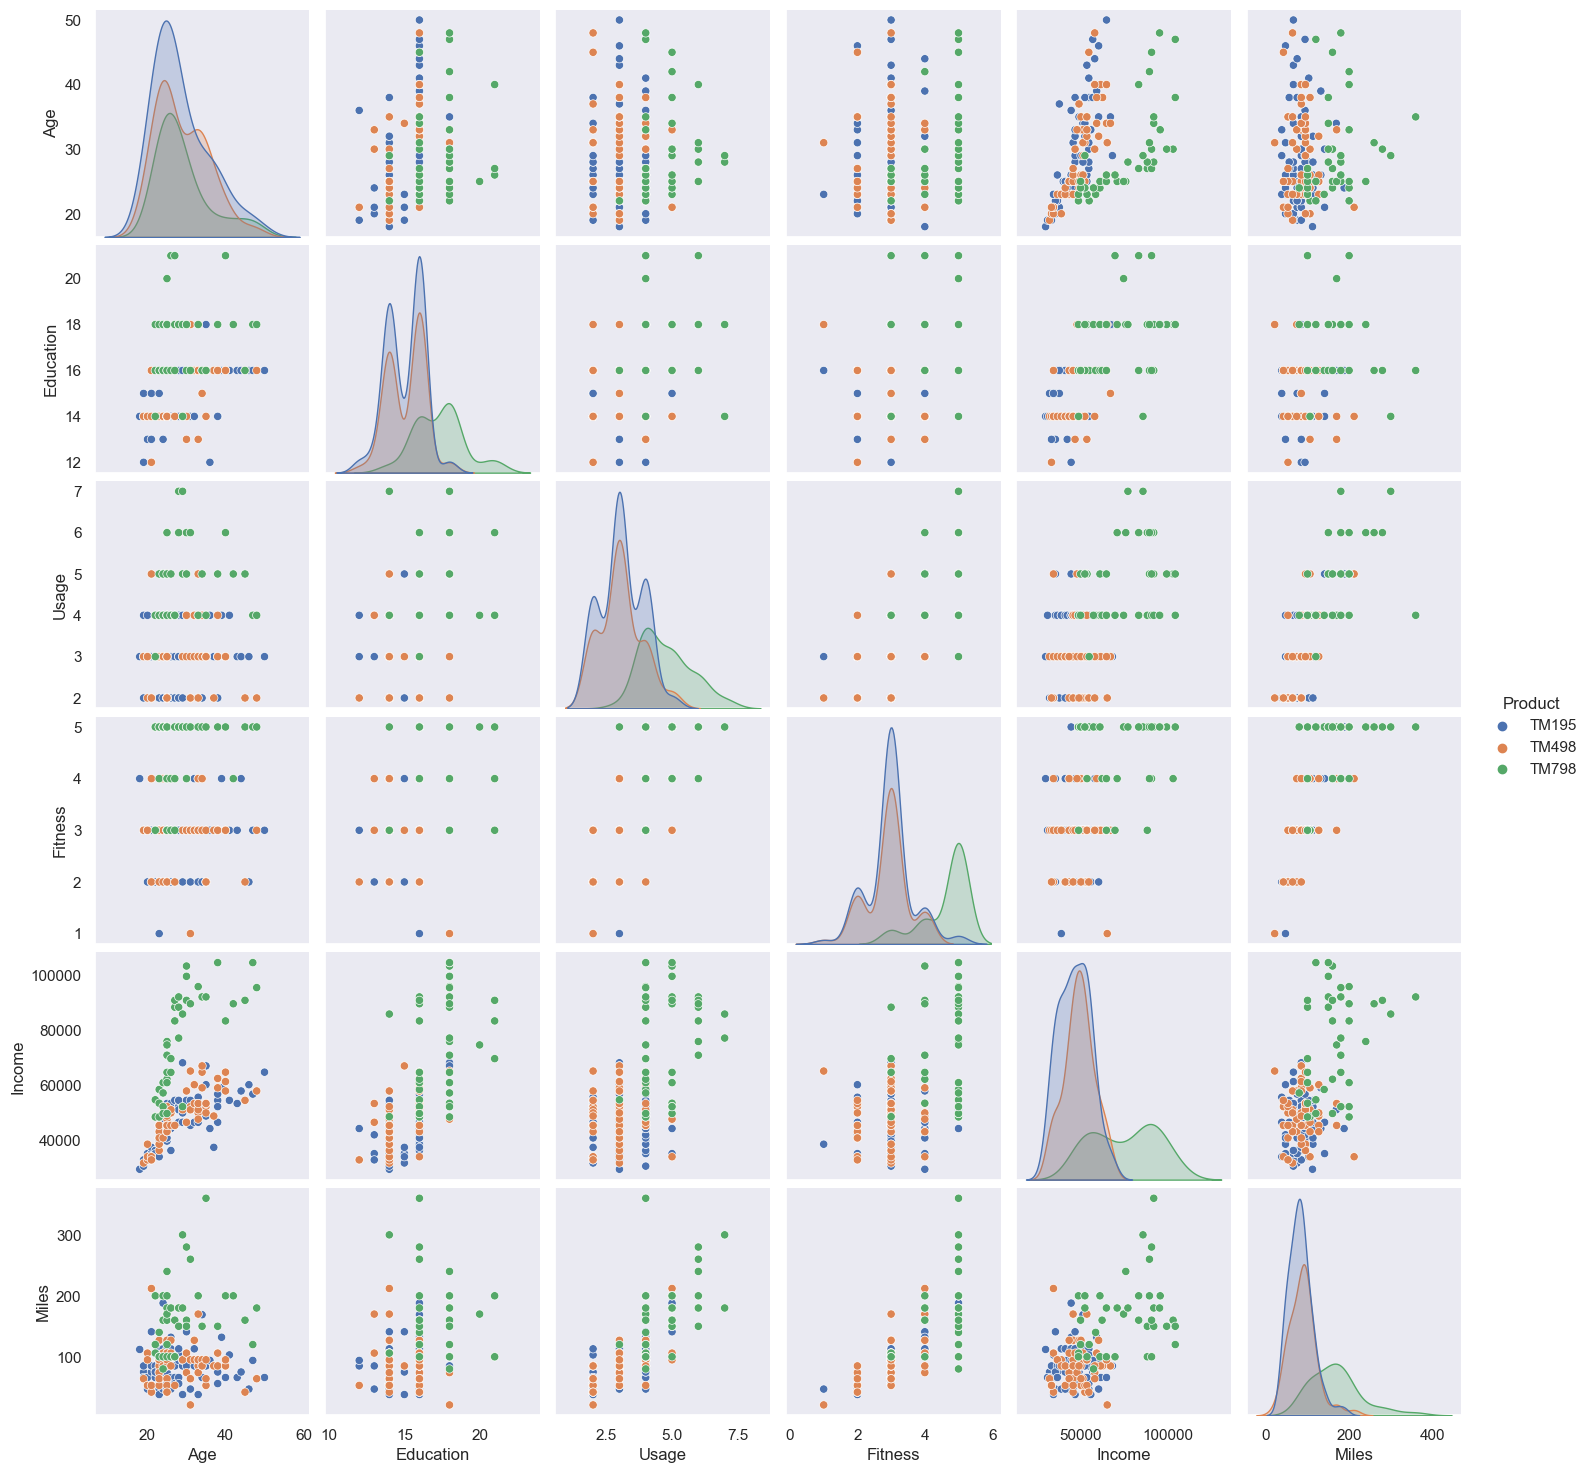

In [172]:
sns.pairplot(data=df, vars = ['Age','Education','Usage','Fitness','Income','Miles'], hue = 'Product');

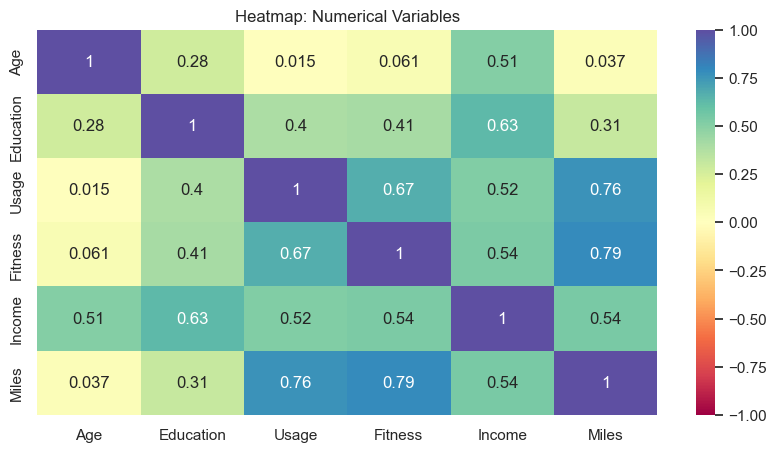

In [173]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.title('Heatmap: Numerical Variables')  
plt.show();

**Inference**

Relatively strong corelations

* Fitness and Miles at 0.79 positive corelation
* Usage and Miles at 0.76 positive corelation
* Fitness and Usage at 0.67 positive corelation
* Income and Education at 0.63. (Not necessarily useful for business case)
* Income and Age also has positive corelation. (Not necessarily useful for business case)

C:\Users\skothapalli\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\skothapalli\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\skothapalli\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\skothapalli\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\skothapalli\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: Us

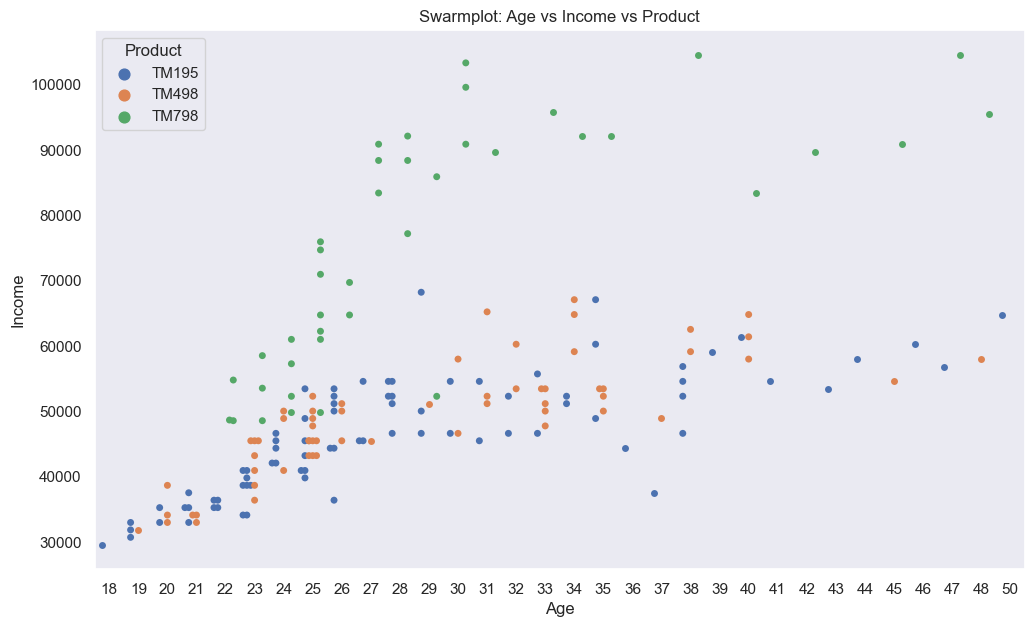

In [174]:
plt.figure(figsize=(12,7))
sns.swarmplot(data=df, x='Age', y='Income', hue='Product', dodge = True);
plt.title('Swarmplot: Age vs Income vs Product')  
plt.show();

In [175]:
df.groupby(['Product'])['Income'].mean()

Product
TM195   46418.025
TM498   48973.650
TM798   75441.575
Name: Income, dtype: float64

In [176]:
df.loc[df['Product'] == 'TM798']['Income'].mean()/df.loc[df['Product'] == 'TM498']['Income'].mean()

1.5404523657109486

In [177]:
df.loc[df['Product'] == 'TM798']['Income'].mean()/df.loc[df['Product'] == 'TM195']['Income'].mean()

1.6252646466539666

In [178]:
df.groupby(['Product'])['Age'].mean()

Product
TM195   28.550
TM498   28.900
TM798   29.100
Name: Age, dtype: float64

In [179]:
df.groupby(['Product'])['Education'].mean()

Product
TM195   15.037
TM498   15.117
TM798   17.325
Name: Education, dtype: float64

**Inferences**

* Mean age of customers choosing TM195, TM498 and TM798 range between 28.5 to 29.1
* Mean Income of customers choosing TM798 is 75,441.575 is at least than 54% AND 62% higher than TM498 and TM195 respectively. 

In [180]:
df.groupby(['Product'])['Miles'].mean()

Product
TM195    82.787
TM498    87.933
TM798   166.900
Name: Miles, dtype: float64

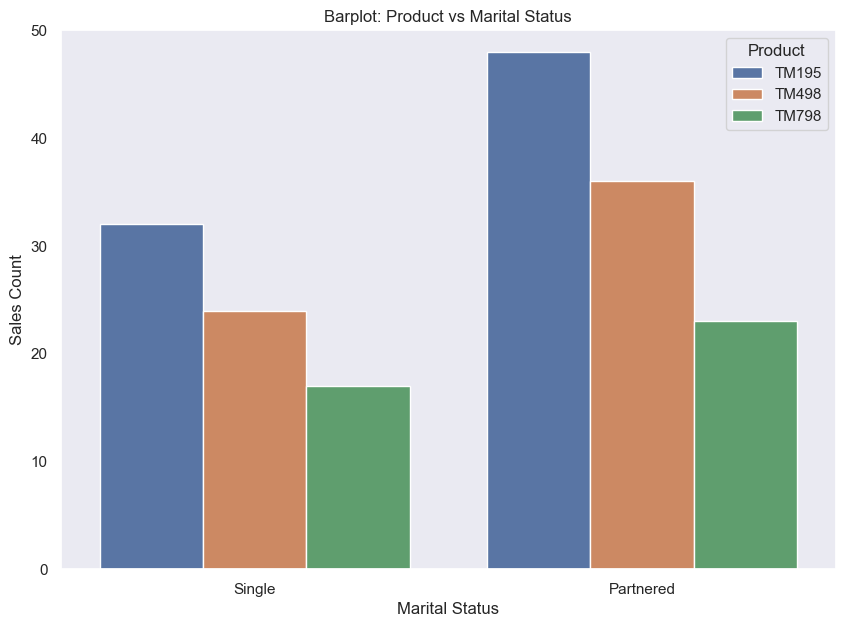

In [181]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='MaritalStatus', hue='Product');
plt.title('Barplot: Product vs Marital Status')
plt.ylim(0,50)
plt.xlabel('Marital Status')
plt.ylabel('Sales Count')
plt.show();

In [182]:
df.groupby(['MaritalStatus'])['Product'].describe()

,count,unique,top,freq
MaritalStatus,,,,
Partnered,107,3,TM195,48
Single,73,3,TM195,32


In [183]:
df.loc[df['MaritalStatus'] == 'Partnered']['Product'].value_counts(normalize = True)*100

TM195   44.860
TM498   33.645
TM798   21.495
Name: Product, dtype: float64

In [184]:
df.loc[df['MaritalStatus'] == 'Single']['Product'].value_counts(normalize = True)*100

TM195   43.836
TM498   32.877
TM798   23.288
Name: Product, dtype: float64

**Inferences**

* Marital status has no significance influence in choosing between the specific treadmill model. i.e; TM195 @ 43.8%,TM498 @ 32.8% and TM798 @ 23.2% are equally being preferred by both Single and Partnered customers when considering a specific model.     

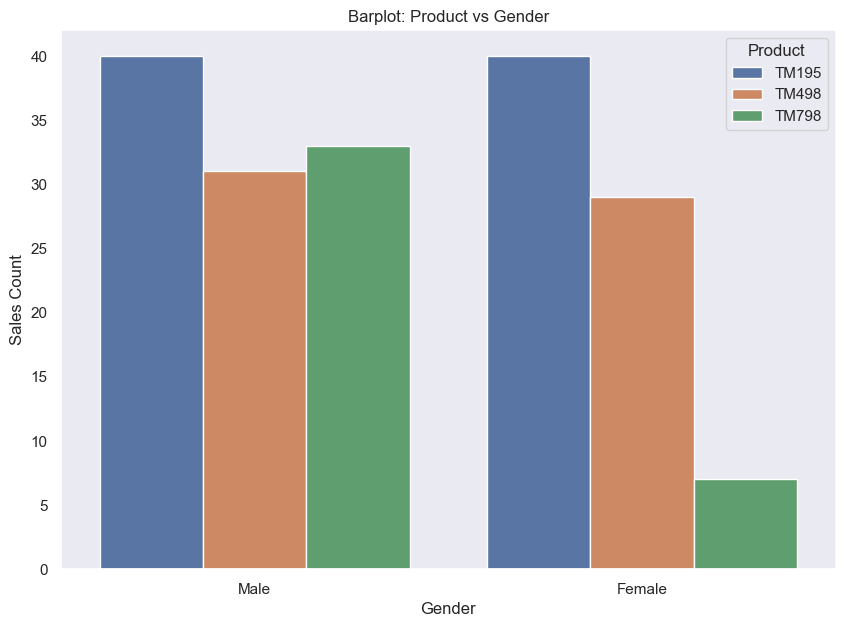

In [185]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='Gender', hue='Product');
plt.title('Barplot: Product vs Gender')
plt.ylim(0,42)
plt.xlabel('Gender')
plt.ylabel('Sales Count')
plt.show();

In [186]:
df.loc[df['Gender'] == 'Female']['Product'].value_counts(normalize = True)*100

TM195   52.632
TM498   38.158
TM798    9.211
Name: Product, dtype: float64

In [187]:
df.loc[df['Gender'] == 'Male']['Product'].value_counts(normalize = True)*100

TM195   38.462
TM798   31.731
TM498   29.808
Name: Product, dtype: float64

**Inferences**

* 9% of Females and 31% of Male prefers TM798 

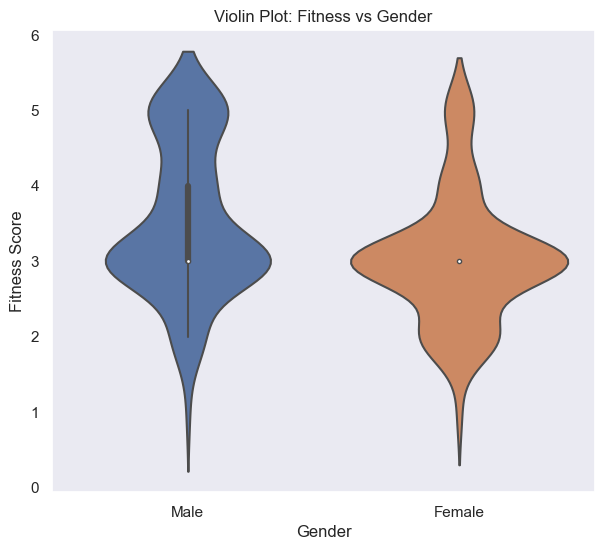

In [188]:
plt.figure(figsize=(7,6));
sns.violinplot(data=df, x='Gender', y = 'Fitness');
plt.title('Violin Plot: Fitness vs Gender')
plt.xlabel('Gender')
plt.ylabel('Fitness Score')
plt.show();

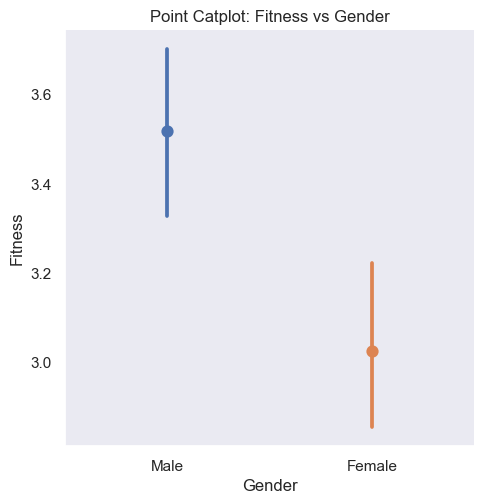

In [189]:
sns.catplot(data=df, x='Gender', y='Fitness', hue = 'Gender', kind = 'point');
plt.title('Point Catplot: Fitness vs Gender')
plt.xlabel('Gender')
plt.ylabel('Fitness')
plt.show(); 
# Point kind in Catplot shows the mean and 95% Confidence interval for the Fitness Scores for (2) Genders

In [190]:
df.groupby(['Gender'])['Fitness'].mean()

Gender
Female   3.026
Male     3.519
Name: Fitness, dtype: float64

**Inferences**

* Males have higher mean fitness scores than Females by 0.5

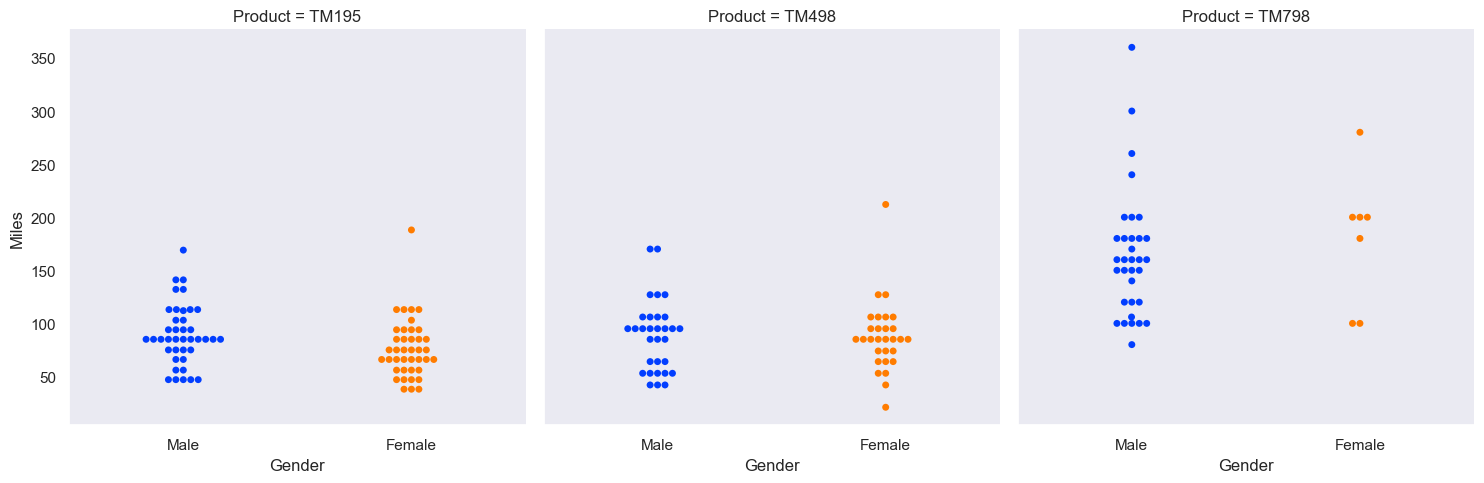

In [191]:
sns.catplot(data=df, x="Gender", y="Miles", col="Product", kind='swarm', palette='bright');
plt.show();

In [192]:
df.groupby(['Product'])['Gender'].value_counts(normalize = True)*100

Product  Gender
TM195    Female   50.000
         Male     50.000
TM498    Male     51.667
         Female   48.333
TM798    Male     82.500
         Female   17.500
Name: Gender, dtype: float64

In [193]:
df.groupby(['Product'])['Gender'].value_counts()

Product  Gender
TM195    Female    40
         Male      40
TM498    Male      31
         Female    29
TM798    Male      33
         Female     7
Name: Gender, dtype: int64

**Inferences**

* Relatively equal amounts of Female and Male choose TM195 and TM498
* Out of the total TM798 product sales (40) about 78.78% are male customers
* Highest mean miles are on TM798 at 166.90 in comparison to TM195 (82.7%) and TM498 (87.9%)


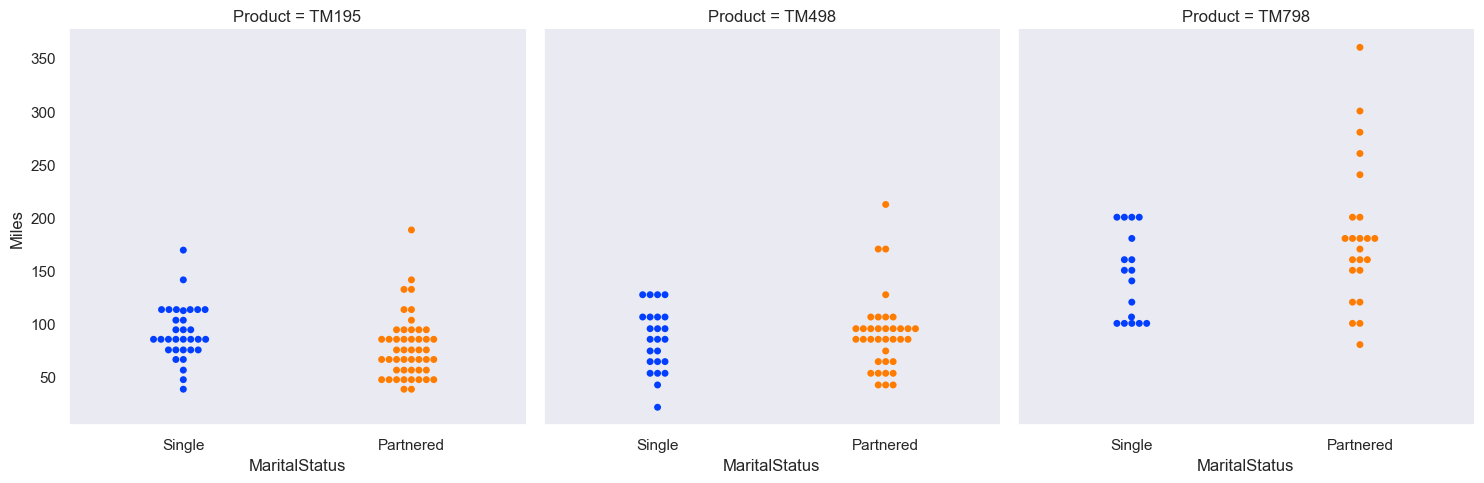

In [194]:
sns.catplot(data=df, x="MaritalStatus", y="Miles", col="Product", kind='swarm', palette='bright');
plt.show();

In [195]:
df.groupby(['Product'])['MaritalStatus'].value_counts()

Product  MaritalStatus
TM195    Partnered        48
         Single           32
TM498    Partnered        36
         Single           24
TM798    Partnered        23
         Single           17
Name: MaritalStatus, dtype: int64

**Inferences**

* Singles have lower sales in comparison to partnered customers for all three products. 


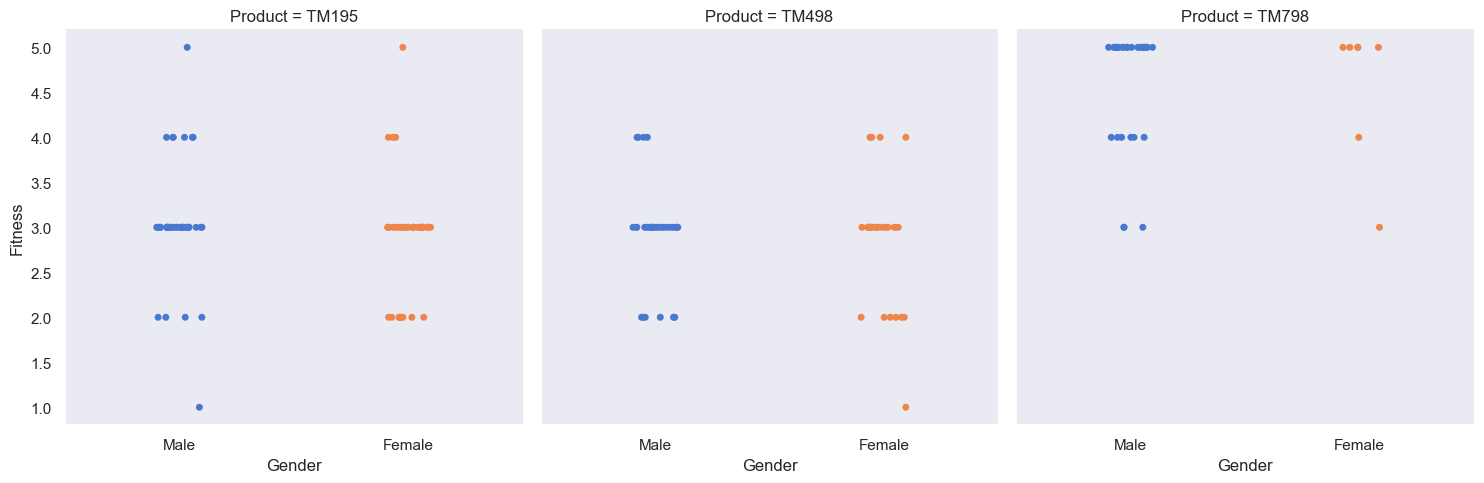

In [196]:
sns.catplot(data=df, x="Gender", y="Fitness", col="Product", kind='strip', palette='muted');

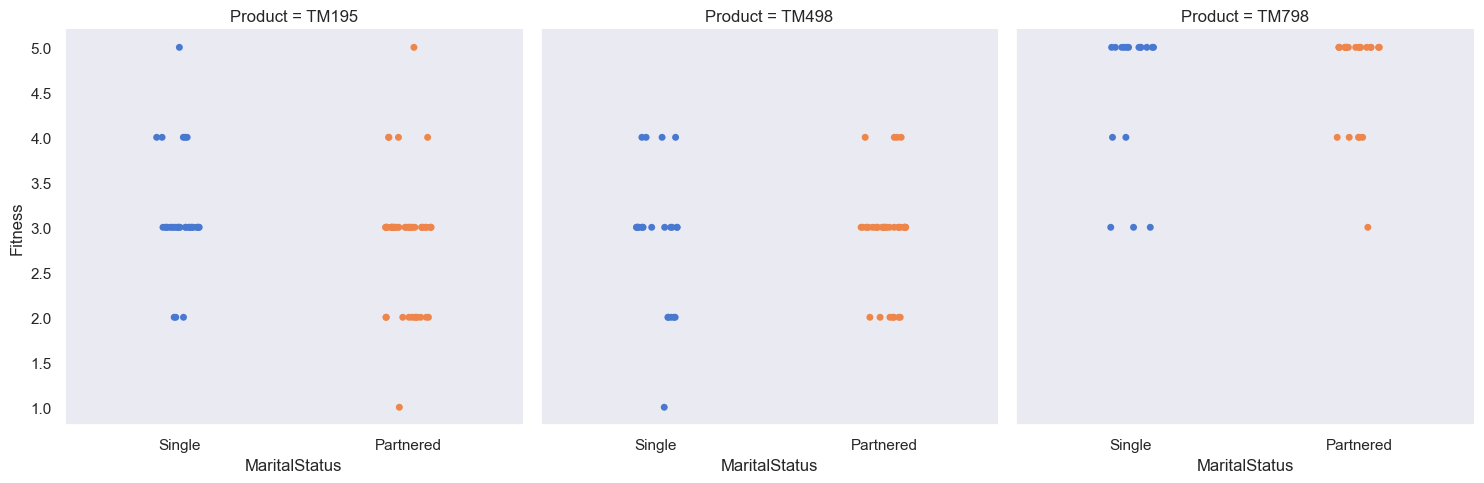

In [197]:
sns.catplot(data=df, x="MaritalStatus", y="Fitness", col="Product", kind='strip', palette='muted');

In [198]:
df.groupby(['Product'])['Fitness'].mean()

Product
TM195   2.962
TM498   2.900
TM798   4.625
Name: Fitness, dtype: float64

**Inferences**

* People with higher fitness score prefers TM798. Mean for TM195, TM498 and TM798 are 2.9, 2.9 and 4.6 respectively

**Product vs Miles**

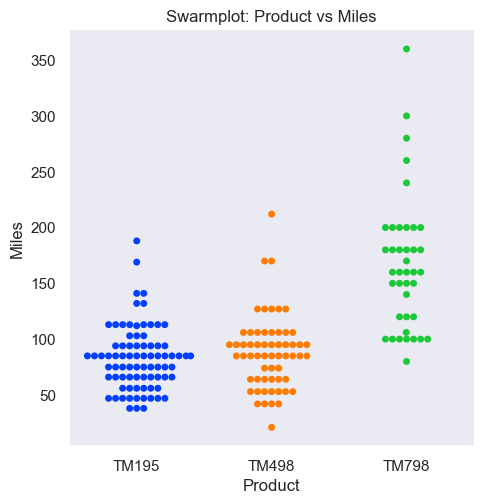

In [199]:
sns.catplot(data=df, x="Product", y="Miles", kind='swarm', palette='bright');
plt.title('Swarmplot: Product vs Miles')
plt.xlabel('Miles')
plt.xlabel('Product')
plt.show();

In [200]:
df.groupby(['Product'])['Miles'].mean()

Product
TM195    82.787
TM498    87.933
TM798   166.900
Name: Miles, dtype: float64

**Inferences**

* Product TM195 and TM498 has relatively equal mean miles at 82.787 and 87.933 
* Product TM798 has 166.9 mean miles

### Outlier Detection and Treatment

In [201]:
df_copy = df.copy() #creating a new dataset (df_copy) to aviod modifications to existing data frame

In [202]:
df_copy.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Agegroup
0,TM195,18,Male,14,Single,3,4,29562,112,0-20
1,TM195,19,Male,15,Single,2,3,31836,75,0-20
2,TM195,19,Female,14,Partnered,4,3,30699,66,0-20
3,TM195,19,Male,12,Single,3,3,32973,85,0-20
4,TM195,20,Male,13,Partnered,4,2,35247,47,0-20


In [203]:
numeric_columns = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
Q1 = df_copy[numeric_columns].quantile(0.25)
Q3 = df_copy[numeric_columns].quantile(0.75)

IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = Q1 - 1.5*IQR    #lower_whisker and upper_whisker are left and right limits respectively. All values outside these limits are outliers
upper_whisker = Q3 + 1.5*IQR

In [204]:
((df_copy[numeric_columns] < lower_whisker) | (df_copy[numeric_columns] > upper_whisker)).sum()/df_copy.shape[0]*100
# Percentage of outliers for all numerical columns

Age          2.778
Education    2.222
Usage        5.000
Fitness      1.111
Income      10.556
Miles        7.222
dtype: float64

**Inferences**

Outliers

* Income and Miles has > 5% outlier data

In [205]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df_copy[col].quantile(0.25)  # 25th quantile
    Q3 = df_copy[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df_copy[col] = np.clip(df_copy[col], lower_whisker, upper_whisker)

    return df_copy

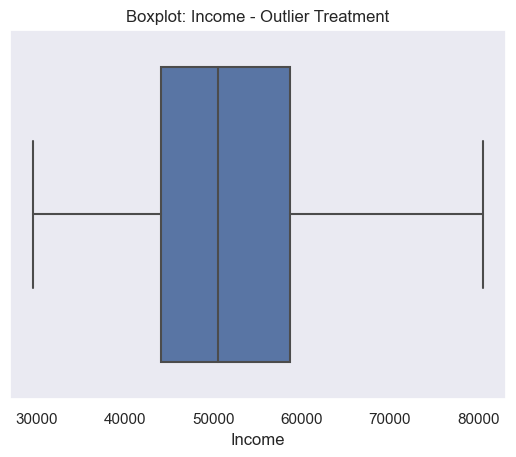

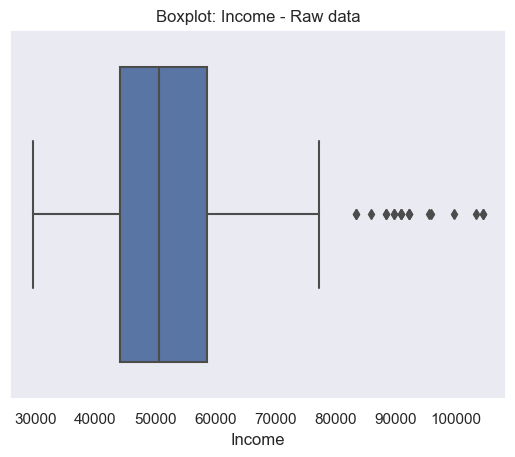

In [206]:
df_copy = treat_outliers(df_copy,'Income')

# visualizing the column after outlier treatment
sns.boxplot(data=df_copy,x='Income')
plt.title('Boxplot: Income - Outlier Treatment')
plt.xlabel('Income')
plt.show()
sns.boxplot(data=df,x='Income')
plt.title('Boxplot: Income - Raw data')
plt.xlabel('Income')
plt.show()

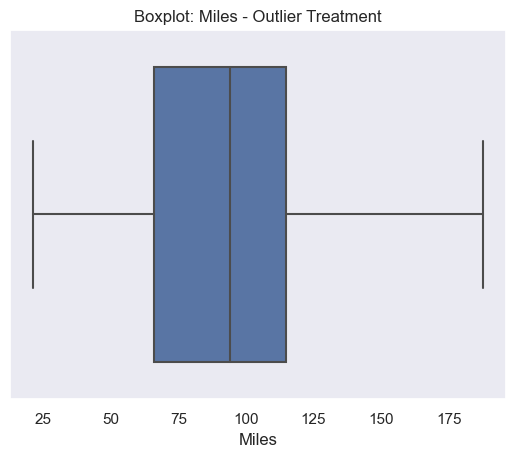

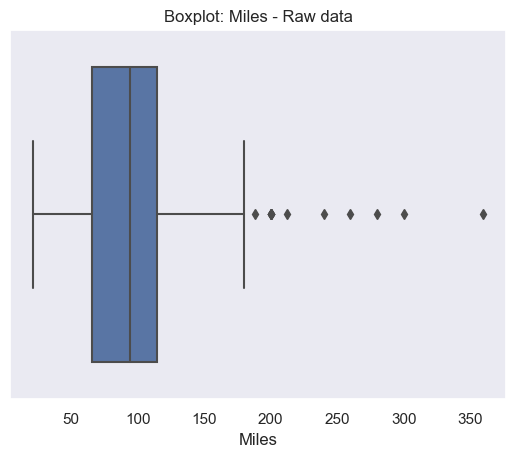

In [207]:
df_copy = treat_outliers(df_copy,'Miles')

# visualizing the column after outlier treatment
sns.boxplot(data=df_copy,x='Miles')
plt.title('Boxplot: Miles - Outlier Treatment')
plt.xlabel('Miles')
plt.show()
sns.boxplot(data=df,x='Miles')
plt.title('Boxplot: Miles - Raw data')
plt.xlabel('Miles')
plt.show()

### Demographic info
**Not necessarily usefiul for business case**

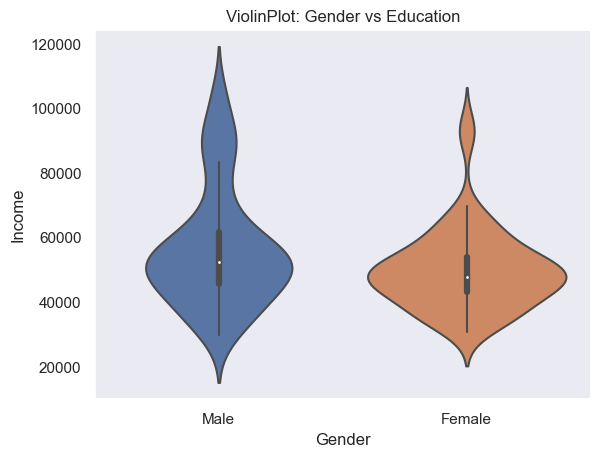

In [208]:
sns.violinplot(data=df, x='Gender', y = 'Income');
plt.title('ViolinPlot: Gender vs Education')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show();

In [209]:
df.groupby(['Gender'])['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,76.000,49828.908,12557.690,30699.000,42921.750,47754.000,53796.000,95866.000
Male,104.000,56562.760,18421.688,29562.000,45480.000,52302.000,61611.250,104581.000


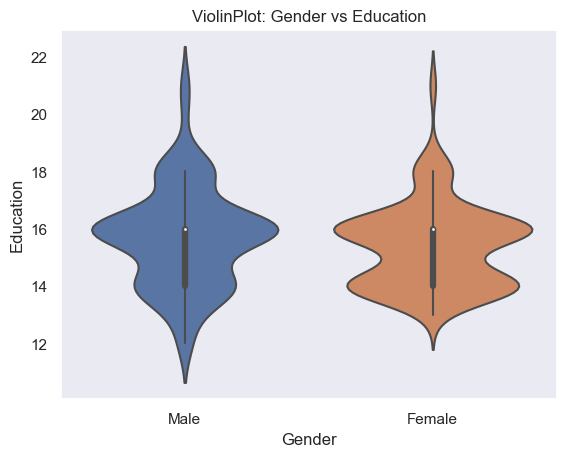

In [210]:
sns.violinplot(data=df, x='Gender', y = 'Education');
plt.title('ViolinPlot: Gender vs Education')
plt.xlabel('Gender')
plt.ylabel('Education')
plt.show();

In [211]:
df.groupby(['Gender'])['Education'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,76.000,15.395,1.443,13.000,14.000,16.000,16.000,21.000
Male,104.000,15.702,1.729,12.000,14.000,16.000,16.000,21.000


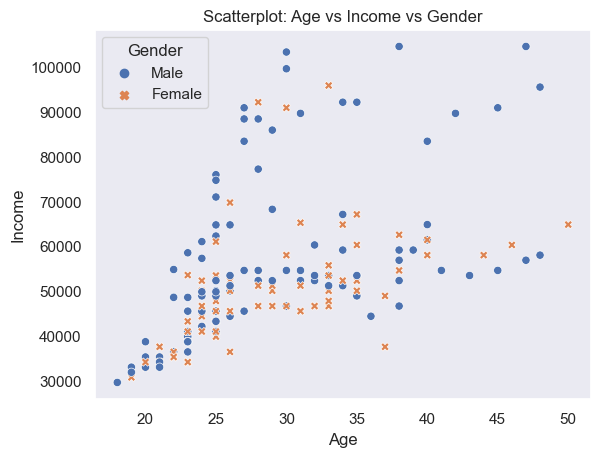

In [212]:
sns.scatterplot(data=df, x='Age', y='Income', hue='Gender', style='Gender');
plt.title('Scatterplot: Age vs Income vs Gender')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show();

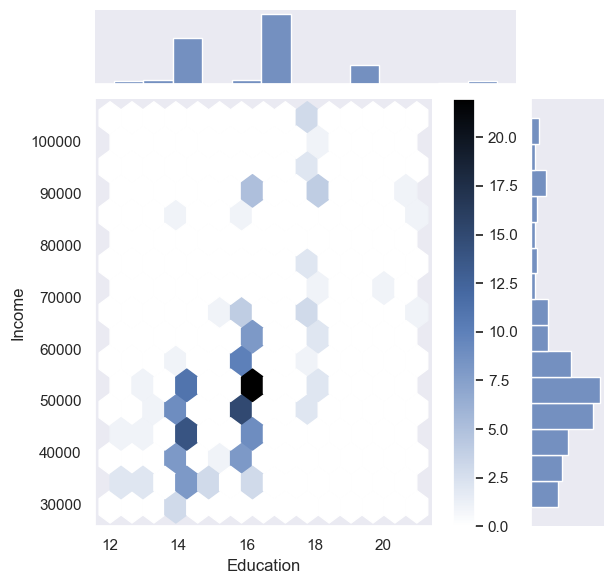

In [213]:
sns.jointplot(data=df, x='Education', y='Income', kind = 'hex');
plt.colorbar();

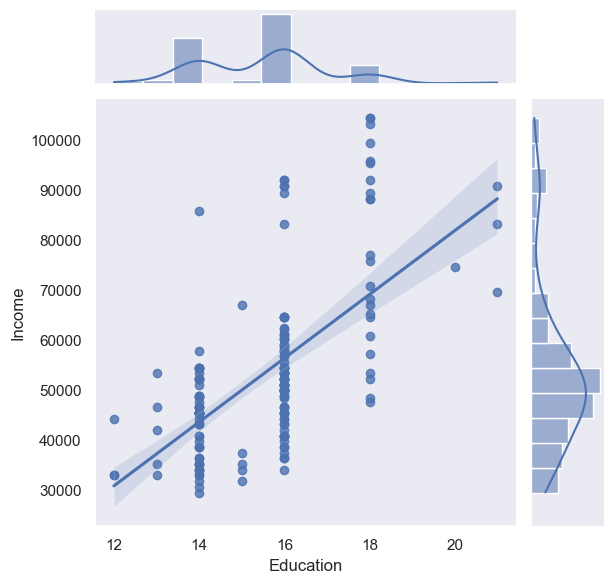

In [214]:
sns.jointplot(data=df, x='Education', y='Income', kind = 'reg');

**Inferences** (Not useful for business case)

* Females mean salary is lower than Males salary by $6,733.852
* Male and Female have very equivalent education years
* Female are less paid than Male
* Income and Age have postitive corelation

### Inferences for Business

**Highlevel Insights into Dataset** 

* 9 Columns and 180 Rows are present in the dataset
* 'Product', 'Gender' and 'MaritalStatus' are Categorical variables
* 'Age', 'Education', 'Usage', 'Fitness', 'Income' and 'Miles' are Numerical variables
* NaN (Not a Number) values are NOT present in the dataset. All columns have 180 values included in the dataset
* No repeated rows are present
* Product: There are (3) unique treadmill models that are being analyzed in the dataset.
* Gender: There are (2) unique Genders. 'Male' and 'Female'
* Marital Status: There are (2) unique Marital Status. 'Single' and 'Partnered'

**Insights into Variable distribution and corelations** 

* Age: Max Age is 50 years and 75% (Q3) <= 33 years. Young adult population consists of significant portion of customer base.
* Income: mean (53,719.578) > Median (50,596.500). Income data could be right skewed and will need further analysis to confirm.
* Miles: mean (103.194) > Median (94.000). Miles data could be right skewed and will need further analysis to confirm.
* Age data is right skewed
* Young adult population consists of significant portion of customer base.
* Education data tends to have multinomial distribution with outliers at right whisker
* Usage data is right skewed and has outliers
* Out of 180 data values only (2) Fitness scores are 1.0
* Mode of Fitness data set is (3) as it is the most occurring.
* Income data is right skewed with outliers.
* Miles data is right skewed with outliers.
* Income and Miles data have the most outliers in comparison to other variables. Outliers are > 5% of the data
* Fitness and Miles; Usage and Miles; Fitness and Usage have considerable positive correlation between them

**Recommendations to Business**

* Model TM195 is the flagship product. Accounts for 44% of total sales.
* Model T498 is the second highest sold product. Accounts for 33% of sales.
* Model TM798 is the least sold product among the three thread mills. Accounts for 22% of sales. Opportunity for owners to consider possible sale promotions for TM798. 
* Partnered customers (107) have more sales in comparison to Single customers (73).
* Male customers (104) have more sales in comparison to female customers (76).
* 20-25 Age group has highest sales percentage at 38% followed by 25-30 Age group at 22% and 30-35 Age group at 17.7%. Together these (3) Age group comprise of 78% of the sales. 
* 50-100 Age group have no sales. Opportunity for owners to consider possible sale promotions for senior citizens.
* Males have higher mean fitness scores than Females by 0.5
* Mean age of customers choosing TM195, TM498 and TM798 range between 28.5 to 29.1
* Mean Income of customers choosing TM798 is 75,441.575 is at least than 54% AND 62% higher than TM498 and TM195 respectively.
* Marital status has no significance influence in choosing between the specific treadmill model. i.e.; TM195 @ 43.8%,TM498 @ 32.8% and TM798 @ 23.2% are equally being preferred by both Single and Partnered customers when considering a specific model.
* 9% of Females and 31% of Male prefers TM798. Opportunity for owners to consider possible modifications into TM798 model to make it more attractive for Female customers.  
* Out of the total TM798 product sales (40) about 78.78% are male customers
* Relatively equal amounts of Female and Male choose TM195 and TM498 (50%)
* Highest mean miles are on TM798 at 166.90 in comparison to TM195 (82.7%) and TM498 (87.9%)
* Singles have lower sales in comparison to partnered customers for all three products
* People with higher fitness score prefers TM798. Mean fitness scores for TM195, TM498 and TM798 are 2.9, 2.9 and 4.6 respectively

**Other non-Business related demographic inferences**

* Females mean salary is lower than Males salary by 6,733.852
* Male and Female have very equivalent education years
* Females are less paid than Male
* Income and Age have positive correlation










